# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

- 함수 익히기

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf.predict([[1, 1]])

array([1])

- 모듈 불러오기

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system 

In [5]:
system("pip install graphviz") #system 함수 컴퓨터에 이 명령을 입력해주는 함수

0

In [6]:
import graphviz 

- 데이터 로드

In [7]:
iris=load_iris()

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris.feature_names
#독립변수 이름

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.target_names
#타겟 종류

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [12]:
from sklearn import tree

In [13]:
clf=tree.DecisionTreeClassifier() #종속변수가 범주형이므로 classfier사용
clf=clf.fit(iris.data,iris.target) #clf.fit(x,y)

- 트리의 시각화

In [14]:
import graphviz 

In [15]:
dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,rounded=True,
                              special_characters=True) 
#out_file=None 파일로 내보내기는 안함
#filled=True 색채움, rounded=True 소수값 간단하게 라운딩
#special_characters=True 특수문자 대비
graph=graphviz.Source(dot_data)


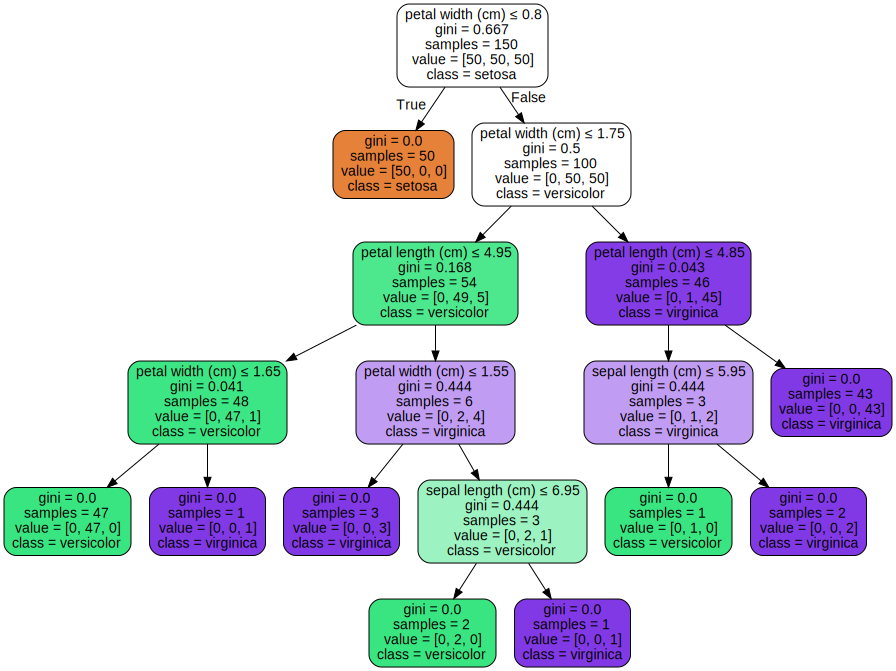

In [16]:
graph

1.petal length가 0.8보다 작거나 같다 -true or false
  value=[50,50,50] y종류 3개가 각각 50,50,50개 있음
  gini:gini가 낮아지는 방향으로 분류함
  class=setosa 처음 클래스는 의미없음

2. value=[50,0,0] setosa만 50개 =petal length가 0.8보다 작거나 같으면 y가 setosa다
   

gini: gini가 낮아지는 방향으로 분류 엔트로피랑 비슷

엔트로피로 하려면 criterion="entropy"
- 엔트로피를 활용한 트리

In [21]:
clf2=tree.DecisionTreeClassifier(criterion="entropy")
clf2=clf2.fit(iris.data,iris.target)

In [22]:
dot_data2=tree.export_graphviz(clf2,out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,rounded=True,
                              special_characters=True) 

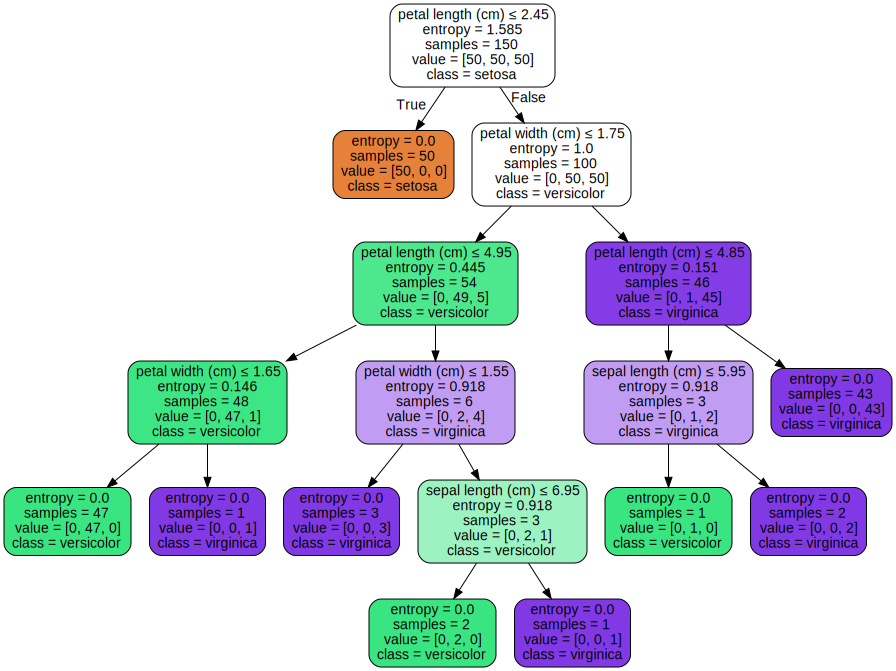

In [23]:
graph=graphviz.Source(dot_data2)
graph

### - 프루닝:오버피팅이 되기전에 적절하게 끈어주는것
#### max_depth=k :노드의 갯수k로 제한하는것

In [25]:
clf3=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf3=clf3.fit(iris.data,iris.target)

- 시각화

In [27]:
dot_data3=tree.export_graphviz(clf3,out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True,rounded=True,
                              special_characters=True) 

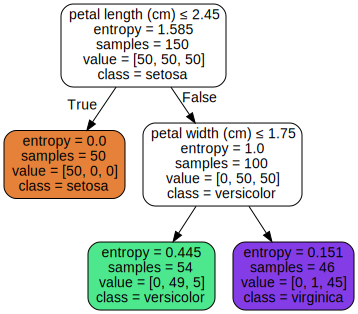

In [33]:
graph=graphviz.Source(dot_data3)
graph
#entropy가 0이 될떄까지 하는것이 아니라 노드 2개에서 끊음 
#모델의 복잡도를 낮춰줌

- Confusion Matrix 구하기

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data)) #지니계수사용모델

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [38]:
confusion_matrix(iris.target,clf2.predict(iris.data))#엔트로피 사용 모델

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [40]:
confusion_matrix(iris.target,clf3.predict(iris.data))#푸루닝한 모델
#나쁜모델이라 볼수 없음 새로운 데이터에 대해서는 더 잘 예측할 수 도 있음(과적합 예방)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# 3. Training - Test 구분해서 해보기 및 Confusion matrix 계산

- train,test 나누기

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,stratify=iris.target,random_state=1)
#stratify=iris.target:종속변수 데이터의 갯수가 어떤것은 너무 적고 어떤것은 너무 많으면 즉, 분포가 고르지 않으면 
#기본적으로 3/4 이 train, 1/4 이 test로 설정됨

In [50]:
clf4=tree.DecisionTreeClassifier(criterion='entropy')
clf4=clf4.fit(x_train,y_train)

In [52]:
confusion_matrix(y_test,clf4.predict(x_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

# 4. Decision regression tree
#### y변수가 연속형인 경우

- 모듈 불러오기 및 데이터 생성

In [54]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [55]:
regr1=tree.DecisionTreeRegressor(max_depth=2)
regr2=tree.DecisionTreeRegressor(max_depth=5)


In [57]:
regr1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
regr2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
X_test=np.arange(0.0,5.0,0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [60]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

In [62]:
y_1 #범주에따라 y가 나눠짐

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

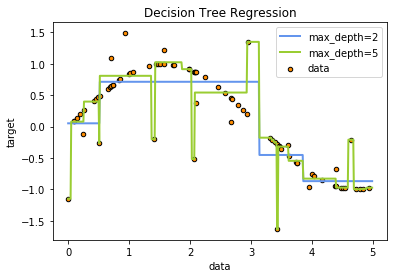

In [63]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

- dapth=2 는 단순한 모형으로 찾음 (파랑)
- depth=5는 너무 복잡함 과적합 우려(초록 계단이 많음)

In [64]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

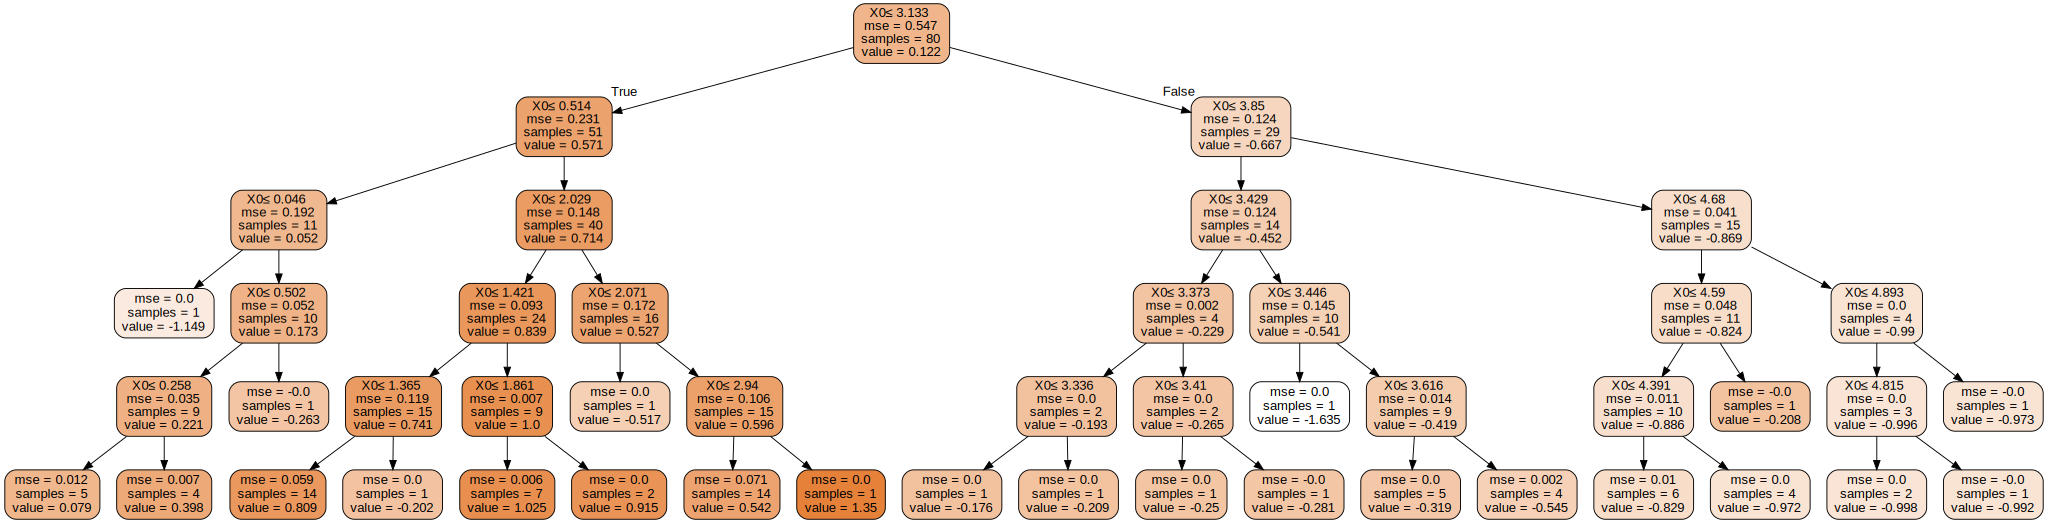

In [65]:
graph4 = graphviz.Source(dot_data4) 
graph4

#### 1.x<=3.133 true이면 왼쪽 false면 오른쪽
#### mse: gini,entropy와 같은걸로 작아지는 방향으로 범주의 범주 선택


- depth=2 그래프

In [69]:
dot_data5 = tree.export_graphviz(regr1, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

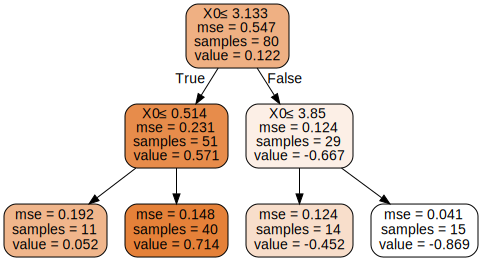

In [70]:
graph5 = graphviz.Source(dot_data5) 
graph5